# Smartphone Insights: Data Cleaning and EDA

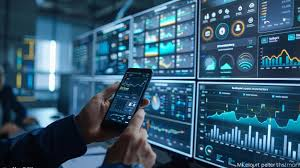

## Problem Statement

In today’s fast-paced mobile industry, consumers rely on online platforms to compare and choose the best smartphones. **Smartprix.com** is a popular comparison website offering detailed specifications, reviews, and ratings of a wide range of smartphones. With comprehensive data on various mobile devices, it serves as a valuable resource for anyone looking to make an informed purchase.

For this project, we scraped smartphone data directly from **Smartprix.com** using **Octoparse**, a web scraping tool that allows efficient extraction of data from structured websites. The dataset includes a wide array of specifications such as brand, model, release date, display size, processor, RAM, storage, camera features, and pricing.

However, raw scraped data often comes with inconsistencies, missing values, and noise, making it unsuitable for analysis in its original form. Therefore, the **primary objective** of this project is twofold:

**1. Data Cleaning**: We will first focus on cleaning the dataset by addressing issues such as missing values, incorrect data types, and inconsistent entries. This process will ensure a high-quality dataset suitable for further analysis.

**2. Exploratory Data Analysis (EDA)**: Once the data is cleaned, we will perform an in-depth EDA to uncover key insights about the smartphone market. This will include analyzing trends in specifications, identifying popular brands and features, and exploring pricing patterns.

By the end of this project, we aim to provide actionable insights and a comprehensive overview of the current landscape of smartphones, leveraging data from Smartprix.com. The results can assist consumers in making better purchase decisions and offer valuable market analysis for industry stakeholders.

<br>

## Dataset Overview

The dataset contains detailed information about various **smartphones** scraped from **Smartprix.com** using **Octoparse**. It includes the following columns:

- **1. Title**: The model name of the smartphone.
- **2. Price**: The listed price of the smartphone, noted with currency symbols (e.g., ₹47,299).
- **3. SIM & Connectivity**: Information on SIM type and supported network technologies.
- **4. Processor**: Details about the processor used in the smartphone, including the chipset and clock speed.
- **5. Memory**: RAM and inbuilt storage specifications.
- **6. Battery**: Battery capacity along with charging speed.
- **7. Display**: Screen size, resolution, refresh rate, and display type.
- **8. Camera**: Details about rear and front camera specifications.
- **9. Memory Card Support**: Indicates whether a memory card is supported and its capacity.
- **10. Operating System (OS)**: The Android/IOS version installed on the device.
- **11. Spec Score**: A score indicating the overall specification quality of the smartphones.

<br>

## Data Loading

### Import necessary libraries for analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
df = pd.read_csv('Mobile Phones _ Mobile Phones Online at Best Prices in India 2024 _ Smartprix.csv')
df.sample(4)

,title,price,sim,processor,memory,battery,display,camera,memory_card,os,spec_score
314,iQOO Z9s Pro (8GB RAM + 256GB),"₹26,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 7 Gen3, Octa Core, 2.63 GHz Processor","8 GB RAM, 256 GB inbuilt",5500 mAh Battery with 80W Fast Charging,"6.77 inches, 1080 x 2392 px, 120 Hz Display wi...",50 MP + 8 MP Dual Rear & 16 MP Front Camera,Memory Card Not Supported,Android v14,84
169,Xiaomi Redmi Note 13 5G (12GB RAM + 256GB),"₹16,990","Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, IR B...","Dimensity 6080, Octa Core, 2.4 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,"Memory Card Supported, upto 1 TB",Android v13,85
564,Realme 12 5G (8GB RAM + 128GB),"₹13,723","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6100 Plus, Octa Core, 2.2 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.72 inches, 1080 x 2400 px, 120 Hz Display wi...",108 MP + 2 MP Dual Rear & 8 MP Front Camera,"Memory Card (Hybrid), upto 2 TB",Android v14,80
453,Vivo V30e (8GB RAM + 256GB),"₹25,699","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 6 Gen1, Octa Core, 2.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5500 mAh Battery with 44W Fast Charging,"6.78 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP Dual Rear & 50 MP Front Camera,Memory Card (Hybrid),Android v14,86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1020 non-null   object
 1   price        1020 non-null   object
 2   sim          1020 non-null   object
 3   processor    1020 non-null   object
 4   memory       1020 non-null   object
 5   battery      1020 non-null   object
 6   display      1020 non-null   object
 7   camera       1020 non-null   object
 8   memory_card  1020 non-null   object
 9   os           1008 non-null   object
 10  spec_score   1020 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 87.8+ KB


<br>
<br>

## Data Cleaning

### Converting feature to its appropriate data type

In [5]:
# Remove the currency symbol (₹) and commas, then convert to integer
df['price'] = df['price'].str.replace(r'[₹,]', '', regex=True).astype(int)

### Checking for missing values

In [6]:
df.isnull().sum().sort_values(ascending=False)

os             12
title           0
price           0
sim             0
processor       0
memory          0
battery         0
display         0
camera          0
memory_card     0
spec_score      0
dtype: int64

In [7]:
df[df['os'].isnull()]

,title,price,sim,processor,memory,battery,display,camera,memory_card,os,spec_score
341,Jio Bharat J1 4G,1799,"Single Sim, 3G, 4G, VoLTE","512 MB RAM, 4 GB inbuilt",2500 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 128 GB",Bluetooth,NaN,23
496,iKall I2 4G,1699,"Dual Sim, 3G, 4G, VoLTE",2000 mAh Battery,"2.4 inches, 240 x 360 px Display",0.3 MP Rear Camera,Memory Card Supported,Bluetooth,Browser,NaN,20
501,Nokia 110 4G 2024,2299,"Dual Sim, 3G, 4G",No Wifi,"128 MB RAM, 64 MB inbuilt",1000 mAh Battery,"2 inches, 240 x 320 px Display",Memory Card Supported,Bluetooth,NaN,17
531,Namotel Achhe Din,99,"Dual Sim, 3G, Wi-Fi","1 GB RAM, 4 GB inbuilt",1325 mAh Battery,"4 inches, 720 x 1280 px Display",2 MP Rear & 0.3 MP Front Camera,Android v5.0 (Lollipop),Bluetooth,NaN,30
551,Nokia 105 Dual Sim 2023,1088,Dual Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",1000 mAh Battery,"1.8 inches, 120 x 160 px Display",No Rear Camera,Memory Card Supported,NaN,11
607,Nokia 105 Dual Sim 2023,1061,Dual Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",1000 mAh Battery,"1.8 inches, 120 x 160 px Display",No Rear Camera,Memory Card Supported,NaN,11
632,Nokia 110 4G 2024,2299,"Dual Sim, 3G, 4G",No Wifi,"128 MB RAM, 64 MB inbuilt",1000 mAh Battery,"2 inches, 240 x 320 px Display",Memory Card Supported,Bluetooth,NaN,17
878,itel it5330,1370,Dual Sim,"32 MB RAM, 32 MB inbuilt",1900 mAh Battery,"2.8 inches, 320 x 240 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN,14
880,itel it5330,1370,Dual Sim,"32 MB RAM, 32 MB inbuilt",1900 mAh Battery,"2.8 inches, 320 x 240 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN,14
917,HMD 105,999,Dual Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",1000 mAh Battery,"1.8 inches, 120 x 160 px Display",No Rear Camera,Memory Card Supported,NaN,11


### Handling Missing values

- drop all the rows where the value of **os** is **null** because this are **feature phones** 

In [8]:
df.dropna(inplace=True)

### Checking for duplicate values

In [9]:
df.duplicated().sum()

55

### Dropping duplicate values

In [10]:
df.drop_duplicates(inplace=True)

### Replacing values of `os` column with appropriate values

In [11]:
# Define the condition to identify rows where os has an No FM Radio
condition = (df['os'] == 'No FM Radio') | (df['os'] == 'Bluetooth')

# Swap the values for identified rows
df.loc[condition, ['memory_card', 'os']] = df.loc[condition, ['os', 'memory_card']].values

In [12]:
# most of the phones with Android v14 
df['os'].replace('Memory Card Not Supported', 'Android v14', inplace=True)

In [13]:
# Filter rows with appropriate os
df = df[df['os'].str.contains('Android|iOS', case=False, na=False)]

### Replacing values of `memory_card` column with appropriate values

In [14]:
# Define the condition to identify rows where memory_card has an camera details
condition = df['memory_card'].str.contains('MP')

# Swap the values for identified rows
df.loc[condition, ['camera', 'memory_card']] = df.loc[condition, ['memory_card', 'camera']].values

In [15]:
df['memory_card'].replace('No FM Radio', 'Not Supported', inplace=True)
df['memory_card'].replace('Memory Card Not Supported', 'Not Supported', inplace=True)
df['memory_card'].replace('Bluetooth', 'Not Supported', inplace=True)
df['memory_card'].replace('Foldable Display, Dual Display', 'Not Supported', inplace=True)
df['memory_card'].replace('Dual Display', 'Not Supported', inplace=True)

In [16]:
df['memory_card'].replace(r'Memory Card.*', 'Supported', regex=True, inplace=True)

<br>

## Feature Engineering

### 1. brand name

- The brand_name feature represents the manufacturer or brand of the smartphone, derived from the first word in the title column.

In [17]:
df['brand_name'] = df['title'].str.split().str[0]

### 2. has_5g

The has_5g feature indicates whether a smartphone supports 5G connectivity. It is a binary column with values:

- 1 if the phone supports 5G.
- 0 if the phone does not support 5G.

This feature is extracted from the sim column by checking for the presence of the string "5G".

In [18]:
df['has_5g'] = df['sim'].str.contains('5G').astype(int)

### 3. has_nfc

The has_nfc feature determines whether a smartphone supports NFC (Near Field Communication) technology. It is a binary column with values:

- 1 if the phone supports NFC.
- 0 if the phone does not support NFC.

This feature is derived from the sim column by checking for the presence of the substring "NFC".

In [19]:
df['has_nfc'] = df['sim'].str.contains('NFC', case=False).astype(int)

### 4. has_ir_blaster

The has_ir_blaster feature indicates whether a smartphone is equipped with an IR (Infrared) Blaster. An IR Blaster allows the phone to function as a universal remote for TVs and other appliances. It is a binary column with values:

- 1 if the phone has an IR Blaster.
- 0 if the phone does not have an IR Blaster.

This feature is extracted from the sim column by checking for the presence of the substring "IR Blaster".

In [20]:
df['has_ir_blaster'] = df['sim'].str.contains('IR Blaster', case=False).astype(int)

### 5. processor_brand

- The processor_brand feature indicates the brand of the smartphone's processor, such as Qualcomm, MediaTek, or Apple. 
- It is extracted from the processor column by identifying the brand name at the start of the processor description.

In [21]:
df['processor_brand'] = df['processor'].str.split().str[0]

In [22]:
df['processor_brand'] = df['processor_brand'].replace(
    to_replace=[r'Octa', r'Quad', r'Spreadtrum', r'512', r'Samsung', 
               r'ADimensity', r'(Dimensity', r'Dimensit', r'(', r'(28'], 
    value='Dimensity', 
)

In [23]:
df['processor_brand'].replace(to_replace=['Apple', 'Apple,'], value='Bionic', inplace=True)
df['processor_brand'].replace('Google', 'Tensor', inplace=True)
df['processor_brand'].replace('Exynos,', 'Exynos', inplace=True)
df['processor_brand'].replace('Helio,', 'Helio', inplace=True)

### 6. ram

- The ram feature indicates the smartphone’s RAM size in gigabytes (GB), which affects its performance in multitasking and running apps. It is a numerical column extracted from the memory column, where values represent the amount of RAM:

In [24]:
df['ram'] = df['memory'].str.extract(r'(\d+)\s*GB\s*RAM').fillna(0).astype(int)

### 7. internal_memory

- The internal_memory feature indicates the internal storage capacity of the smartphone, typically measured in gigabytes (GB). - It is extracted from the memory column, which usually contains the format "X GB inbuilt". This feature helps to understand the available storage space for apps, photos, and files.

In [25]:
df['internal_memory'] = df['memory'].str.extract(r'(\d+)\s*GB\s*inbuilt').fillna(0).astype(int)

In [26]:
# converting 1TB to 1024GB
df['internal_memory'].replace(0, 1024, inplace=True)

### 8. battery_capacity

- The battery_capacity feature represents the capacity of the smartphone's battery, measured in mAh (milliampere-hour). This value indicates how much charge the battery can store and is typically associated with how long the battery will last.

In [28]:
df['battery_capacity'] = df['battery'].str.split().str[0].astype('int')

### 9. fast_charging_available

The fast_charging_available feature indicates whether a smartphone supports fast charging. Fast charging refers to the phone's ability to charge its battery at a higher rate, typically with a power output greater than the standard 5W.

It is a binary column with values:

- 1 if the phone supports fast charging.
- 0 if the phone does not support fast charging.

In [29]:
df['fast_charging_available'] = df['battery'].str.contains('Fast Charging').astype('int')

### 10. screen_size

The screen_size feature represents the size of the smartphone's display, typically measured diagonally in inches. It is extracted from the display column.

This feature captures the screen size (e.g., 6.5 inches, 6.7 inches) and is represented as a float for precise values (e.g., 6.5, 6.7).

In [30]:
df['screen_size'] = df['display'].str.split().str[0].astype(float)

### 11. primary_camera_rear

The primary_camera_rear feature represents the resolution of the primary (rear) camera on the smartphone. It indicates the camera's megapixel (MP) count and is typically the first value in the camera description.

This feature is extracted from the camera column and represents the resolution of the main rear camera.

In [31]:
df['primary_camera_rear'] = df['camera'].str.split().str[0].astype(float)

### 12. primary_camera_front

The primary_camera_front feature represents the resolution of the front (selfie) camera on the smartphone. It indicates the camera's megapixel (MP) count, typically listed as the second part of the camera description.

In [32]:
df['primary_camera_front'] = df['camera'].str.split('&').str[1].str.split().str[0].astype(float)

### 13. num_cameras

The num_cameras feature indicates the total number of cameras on the smartphone. This includes both rear and front cameras. It is extracted from the camera column by counting the number of camera modules (indicated by the number of megapixels listed).

In [33]:
df['num_cameras'] = df['camera'].apply(lambda x: x.count('+') + 1 + ('Front Camera' in x)).astype(int)

<br>

## Drop unwanted features

In [34]:
df.drop(columns=['sim', 'processor', 'memory', 'battery', 'display', 'camera'], inplace=True)

## Rearranging the features

In [35]:
df = df[['brand_name', 'title', 'price', 'spec_score','screen_size' ,'ram', 'internal_memory', 'os', 'battery_capacity','fast_charging_available' , 'processor_brand', 'memory_card','num_cameras', 'primary_camera_rear', 'primary_camera_front','has_5g', 'has_nfc', 'has_ir_blaster']]

In [ ]:
df.to_csv('smartphone_clean_data.csv', index=False)

<br>

# Exploratory Data Analysis

In [36]:
df = pd.read_csv('smartphone_clean_data.csv')
df.sample()

,brand_name,title,price,spec_score,screen_size,ram,internal_memory,os,battery_capacity,fast_charging_available,processor_brand,memory_card,num_cameras,primary_camera_rear,primary_camera_front,has_5g,has_nfc,has_ir_blaster
221,Samsung,Samsung Galaxy F05,7949,70,6.74,4,64,Android v14,5000,1,Helio,Supported,3,50.0,8.0,0,0,0


## Brand

In [37]:
df['brand_name'] = df['brand_name'].str.lower()

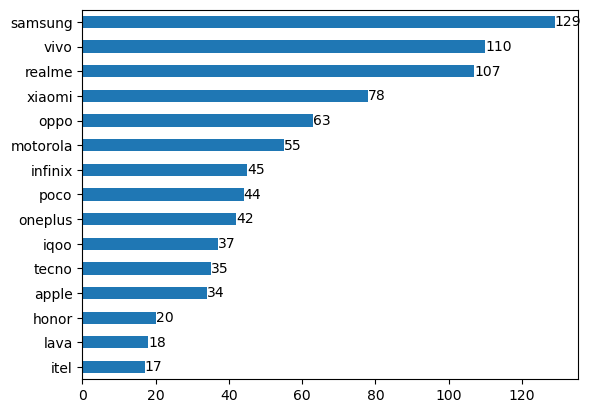

In [38]:
ax = df['brand_name'].str.lower().value_counts().head(15).sort_values(ascending=True).plot(kind='barh')

for bars in ax.containers:
    ax.bar_label(bars)

In [39]:
# Calculate the number of phones for each brand
brand_counts = df['brand_name'].value_counts()

# Filter brands with at least 10 phones
brands_with_min_phones = brand_counts[brand_counts >= 10].index

# Calculate the average price for these filtered brands
avg_price_per_brand = df[df['brand_name'].isin(brands_with_min_phones)].groupby('brand_name')['price'].mean().sort_values(ascending=False)

# Find the brand with the highest average price
costliest_brand = avg_price_per_brand.idxmax()
highest_avg_price = round(avg_price_per_brand.max(),2)

print("The costliest phone brand is {} with an average price of {} rupees.".format(costliest_brand, highest_avg_price))

The costliest phone brand is apple with an average price of 95793.38 rupees.


### Observations:

From the above graph:

- Samsung has the highest number of devices (129).
- Vivo (110) and Realme (107) follow closely.
- Xiaomi (78) and Oppo (63) are mid-tier.
- Apple (34) has fewer devices compared to others but is the costliest brand, with an average price of 95,793.38 rupees.
- Itel (17), Lava (18), and Honor (20) have the least presence.

**Samsung**, **Vivo**, and **Realme** dominate the smartphone market in terms of variety while **Apple** leads in premium pricing.

<br>

## Price

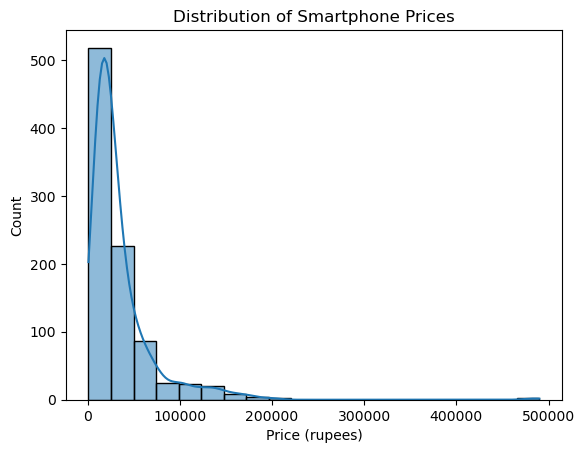

In [40]:
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Smartphone Prices')
plt.xlabel('Price (rupees)')
plt.ylabel('Count')
plt.show()

In [41]:
df['price'].describe()

count       916.000000
mean      34647.609170
std       38374.571587
min         888.000000
25%       13990.000000
50%       22999.000000
75%       38992.250000
max      489990.000000
Name: price, dtype: float64

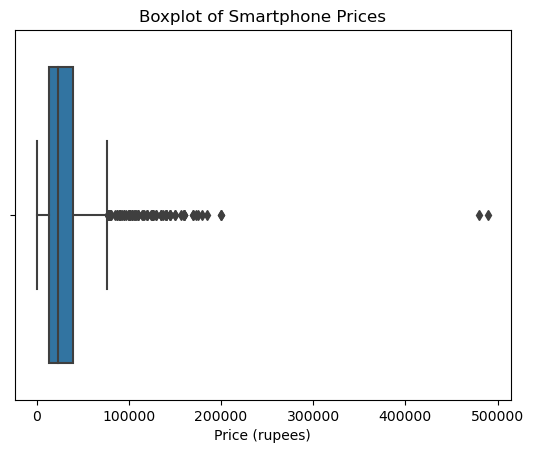

In [42]:
sns.boxplot(df['price'])
plt.title('Boxplot of Smartphone Prices')
plt.xlabel('Price (rupees)')

plt.show()

### Observations:

Based on the output:

- **Price Distribution**: The prices range from ₹888 to ₹4,89,990, with a high variability (std. dev. of ₹38,375).
- **Budget Segment**: More than 500 smartphones are priced under ₹25,000.
- **Mid-Range**: Around 200 phones are priced between ₹25,000 and ₹50,000, indicating a strong mid-tier market.
- **Premium Segment**: About 75 smartphones are in the ₹50,000 to ₹75,000 range, with roughly 75-80 phones priced above ₹75,000.

<br>

## Screen Size

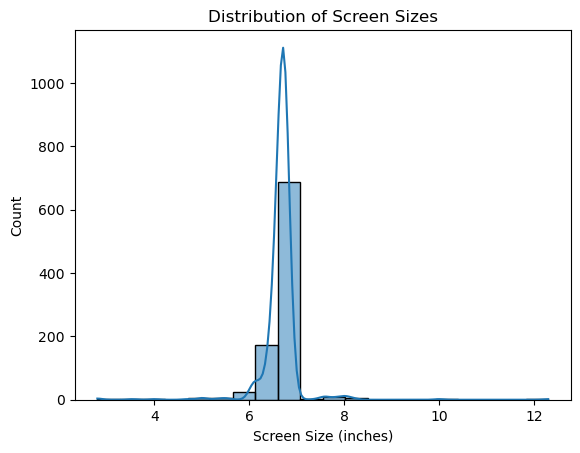

In [43]:
sns.histplot(df['screen_size'], bins=20, kde=True)
plt.title('Distribution of Screen Sizes')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Count')
plt.show()

### Observation:

- From the above graph, most smartphones fall within the 6 to 7-inch screen size range.

<br>

## RAM

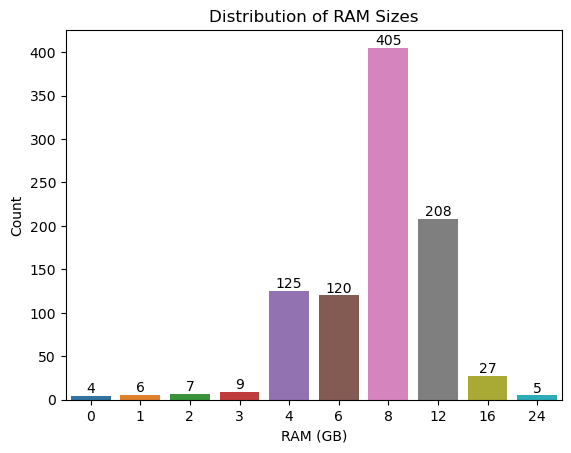

In [44]:
ax = sns.countplot(x='ram', data=df, order=sorted(df['ram'].unique()))
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Distribution of RAM Sizes')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()

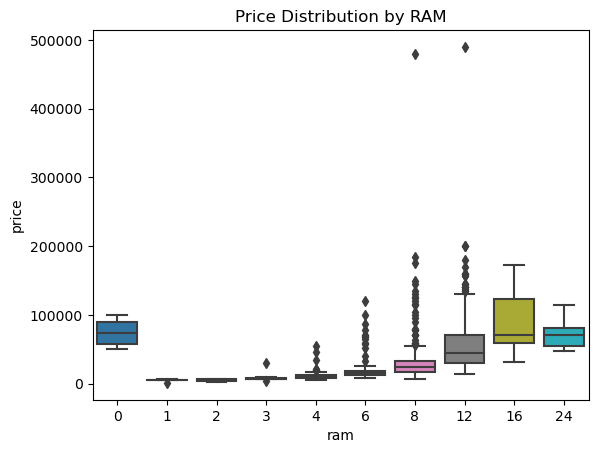

In [45]:
sns.boxplot(x='ram', y='price', data=df)
plt.title('Price Distribution by RAM')
plt.show()

### Observations:

From the above graph,

- Most smartphones have **8GB** RAM, followed by **12GB** RAM, and then **4GB** RAM.
- There is a clear trend: as **RAM size increases**, **the price of the phone also increases**. **Higher RAM configurations** are typically found in **premium or mid-range models**.

This suggests that **RAM size** is a **key factor influencing smartphone pricing**.


<br>

## Internal Memory

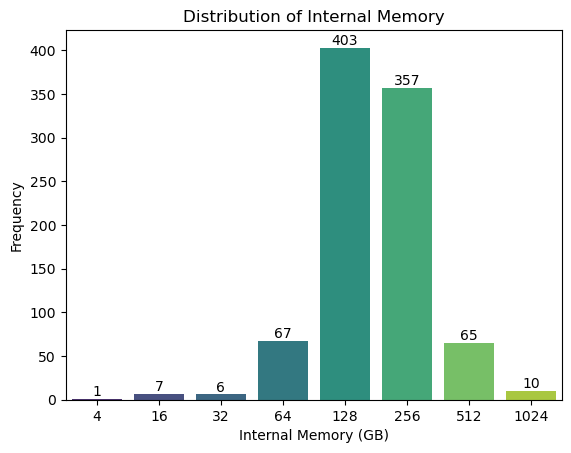

In [46]:
ax = sns.countplot(x='internal_memory', data=df, palette='viridis', order=sorted(df['internal_memory'].unique()))
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Distribution of Internal Memory')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Frequency')

plt.show()

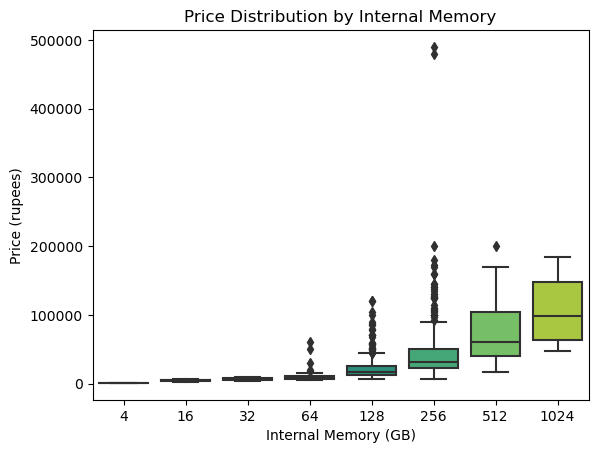

In [47]:
sns.boxplot(x='internal_memory', y='price', data=df, palette='viridis')
plt.title('Price Distribution by Internal Memory')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Price (rupees)')
plt.show()


### Observations:

From the above graph,

- **128GB** is the **most common internal memory configuration**, followed by **256GB** and **64GB**.
- **Higher internal memory** generally **correlates** with **higher smartphone prices**. 
- Models with **512GB** and **1024GB** are **less common** and are typically **premium devices**.

<br>

## Operating System

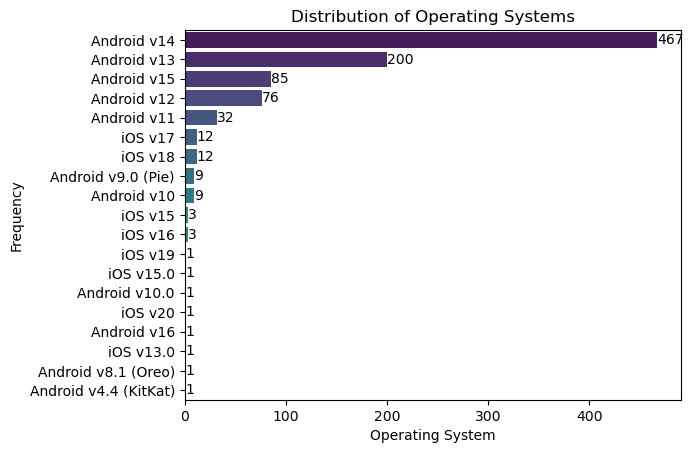

In [48]:
ax = sns.countplot(y='os', data=df, palette='viridis', order=df['os'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Frequency')

plt.show()


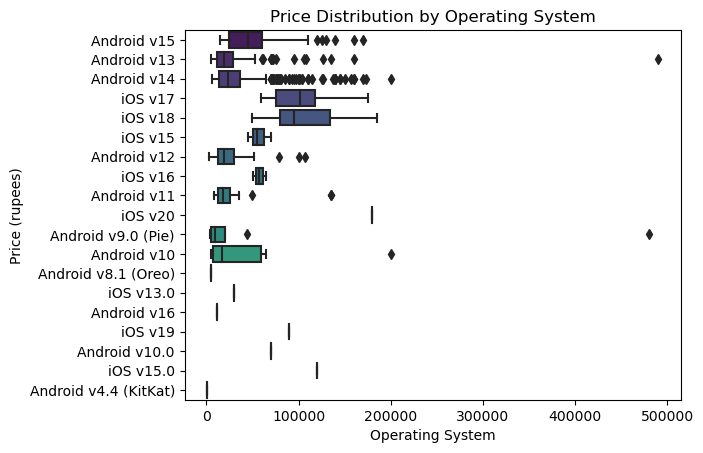

In [49]:
sns.boxplot(y='os', x='price', data=df, palette='viridis')
plt.title('Price Distribution by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Price (rupees)')

plt.show()


### Observations:

From the above graph,

- **Latest Android versions (such as v14, v13 and v15)** are the **most common among smartphones**.
- **Newer OS versions (like Android v15 and iOS 18)** are typically associated with **higher-priced smartphones**, reflecting their presence in premium models.

<br>

## Battery Capacity

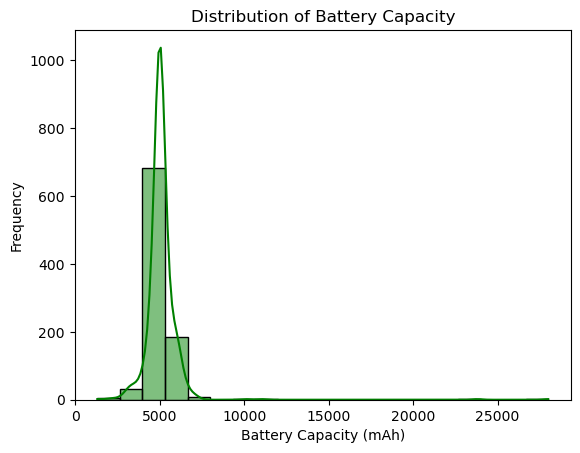

In [50]:
sns.histplot(df['battery_capacity'], bins=20, kde=True, color='green')
plt.title('Distribution of Battery Capacity')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Frequency')
plt.show()


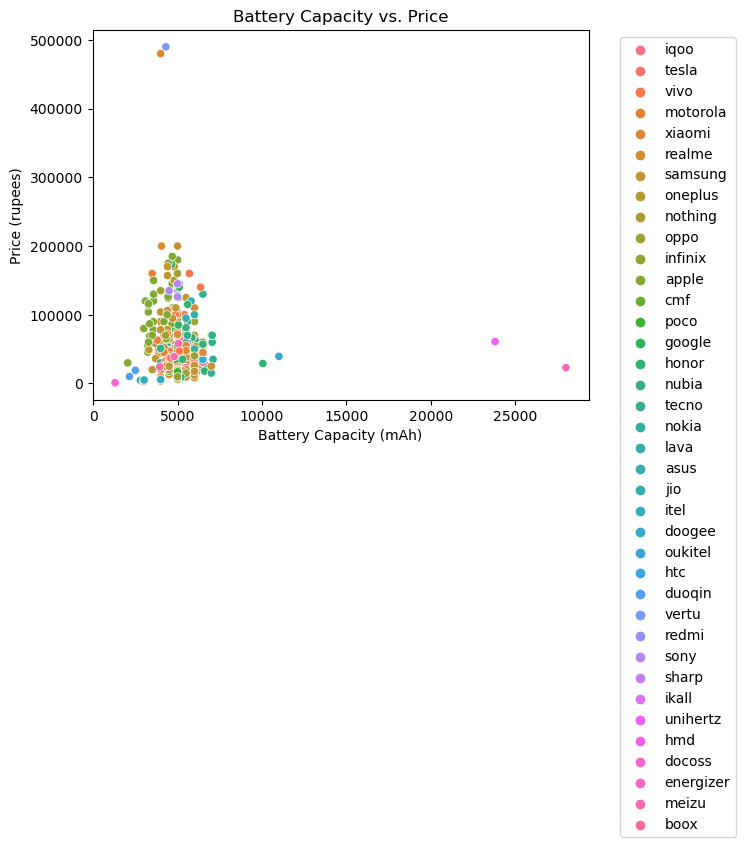

In [51]:
sns.scatterplot(x='battery_capacity', y='price', data=df, hue='brand_name')
plt.title('Battery Capacity vs. Price')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Price (rupees)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Observations:

From the above graphs,

- **Most smartphones** have a battery capacity between **4000-5000 mAh**, indicating this is the **standard range** for most models.
- **4 smartphones** with battery capacities between **10,000-30,000 mAh** exist, but they are **not available in India**.
- **Battery capacity** does **not significantly impact smartphone prices**.

<br>

## Fast Charging Available

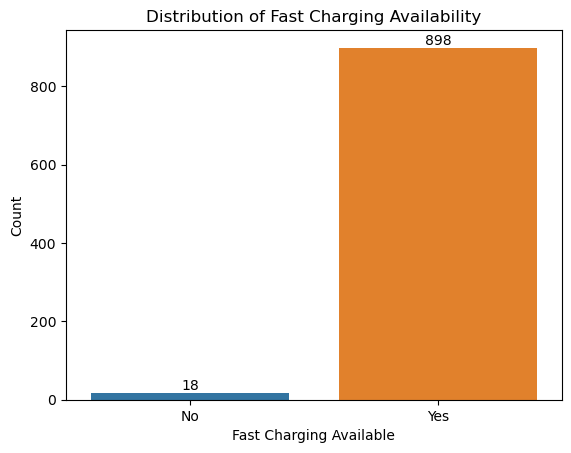

In [52]:
ax = sns.countplot(x='fast_charging_available', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Distribution of Fast Charging Availability')
plt.xlabel('Fast Charging Available')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


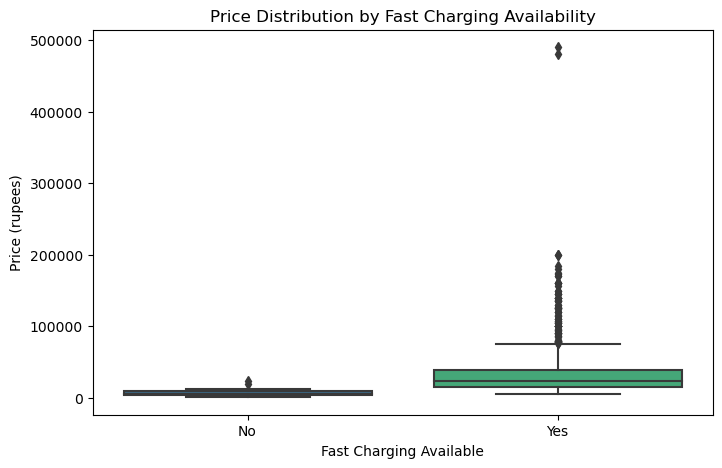

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fast_charging_available', y='price', data=df, palette='viridis')
plt.title('Price Distribution by Fast Charging Availability')
plt.xlabel('Fast Charging Available')
plt.ylabel('Price (rupees)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


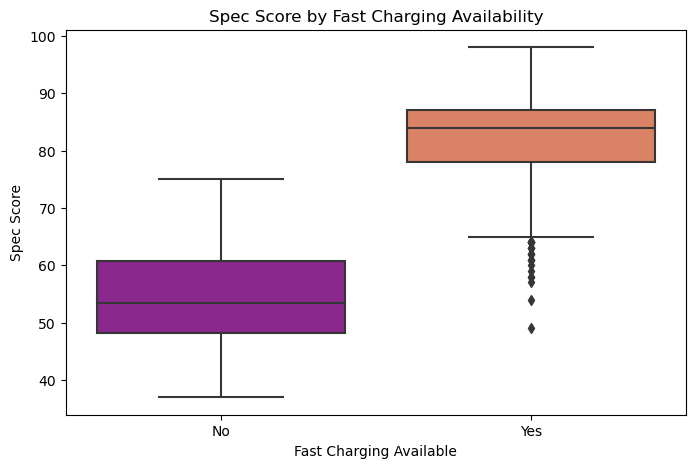

In [54]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fast_charging_available', y='spec_score', data=df, palette='plasma')
plt.title('Spec Score by Fast Charging Availability')
plt.xlabel('Fast Charging Available')
plt.ylabel('Spec Score')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


### Observations:

From the above graph,

- **Fast charging** is available in **98% of smartphones** (898 out of 916), making it a **key feature** in modern devices.
- Phones with **fast charging** generally have **higher prices**, indicating it's more common in premium models.
- **Spec scores** are notably higher for phones with fast charging, suggesting it is often included in **high-performance devices**.


<br>

## Processor Brand

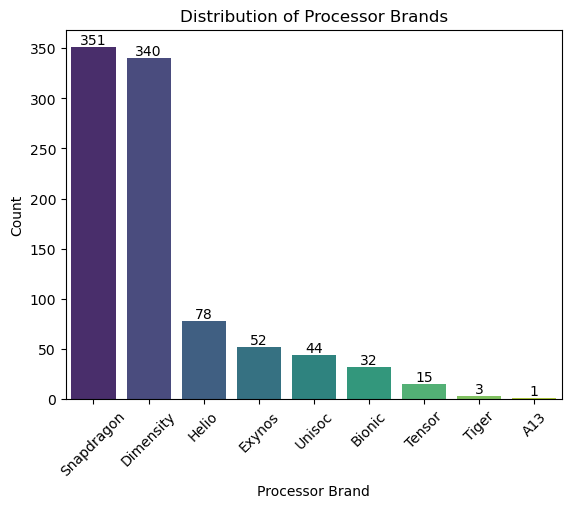

In [55]:
processor_counts = df['processor_brand'].value_counts()
ax = sns.barplot(x=processor_counts.index, y=processor_counts.values, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Distribution of Processor Brands')
plt.xlabel('Processor Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


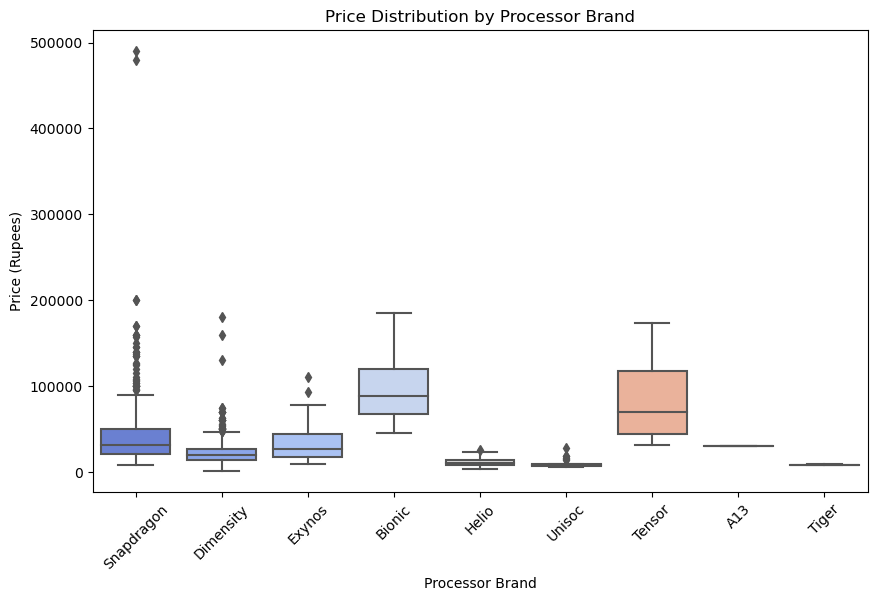

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='processor_brand', y='price', data=df, palette='coolwarm')
plt.title('Price Distribution by Processor Brand')
plt.xlabel('Processor Brand')
plt.ylabel('Price (Rupees)')
plt.xticks(rotation=45)
plt.show()


### Observations

From the above graph,

- **Snapdragon** is the most commonly used processor, found in **351** smartphones, followed closely by **Dimensity** with **340** smartphones.
- **Bionic processors** (used by **Apple**) are the **most expensive**, followed by **Tensor** (used by **Google**) and then **Snapdragon**.
- This indicates that **Bionic** and **Tensor** are primarily found in **premium** smartphones, while **Snapdragon** covers a broader range, including both **mid-range** and **high-end models**.

<br>

## Memory Card

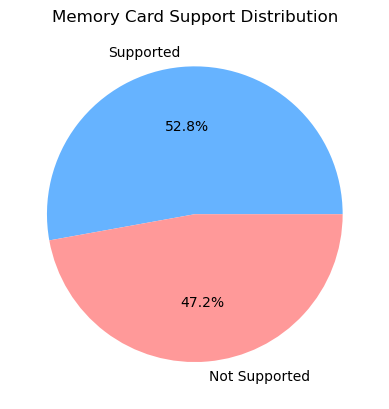

In [57]:
memory_card_counts = df['memory_card'].value_counts()
plt.pie(memory_card_counts, labels=memory_card_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Memory Card Support Distribution')
plt.show()

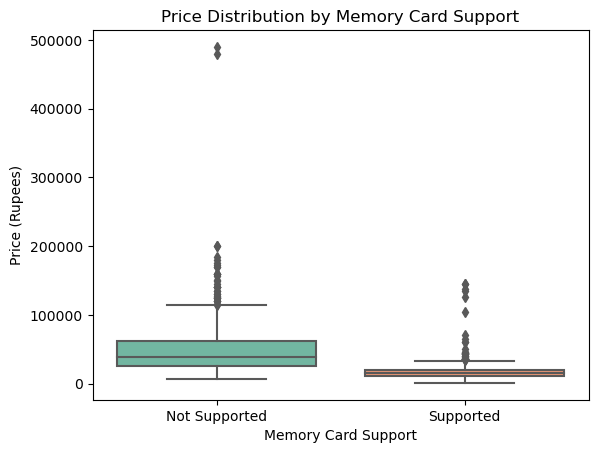

In [58]:
sns.boxplot(x='memory_card', y='price', data=df, palette='Set2')
plt.title('Price Distribution by Memory Card Support')
plt.xlabel('Memory Card Support')
plt.ylabel('Price (Rupees)')
plt.show()

### Observations:

From the above graph,

- **53%** of smartphones **support memory cards**.
- Smartphones with **memory card support** are generally **cheaper** compared to those without. This suggests that **expandable storage** is more common in **budget** or **mid-range** devices, while **premium** models tend to rely solely on internal storage.

<br>

## 5g compatibility

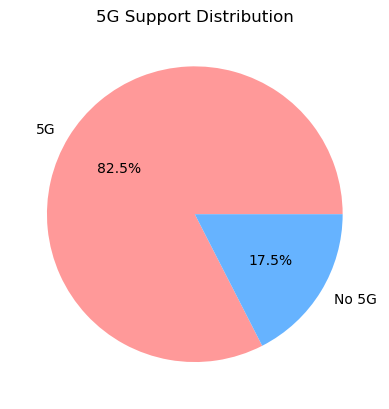

In [59]:
five_g_counts = df['has_5g'].value_counts()
plt.pie(five_g_counts, labels=['5G', 'No 5G'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('5G Support Distribution')
plt.show()


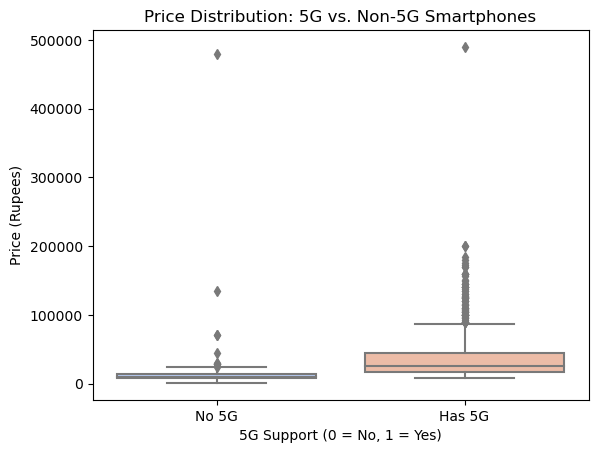

In [60]:
sns.boxplot(x='has_5g', y='price', data=df, palette='coolwarm')
plt.title('Price Distribution: 5G vs. Non-5G Smartphones')
plt.xlabel('5G Support (0 = No, 1 = Yes)')
plt.ylabel('Price (Rupees)')
plt.xticks([0, 1], ['No 5G', 'Has 5G'])
plt.show()

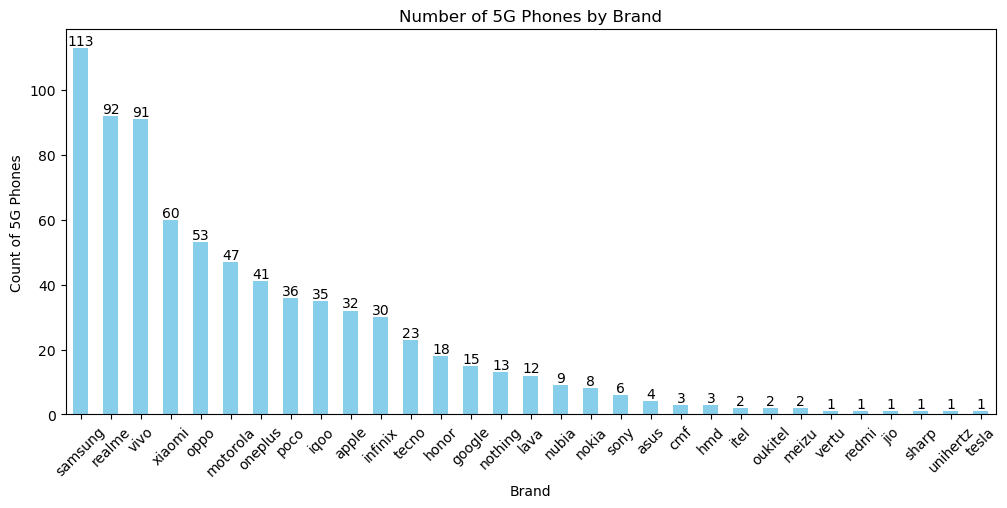

In [61]:
five_g_brands = df[df['has_5g'] == 1]['brand_name'].value_counts()
plt.figure(figsize=(12,5))
ax = five_g_brands.plot(kind='bar', color='skyblue')
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Number of 5G Phones by Brand')
plt.xlabel('Brand')
plt.ylabel('Count of 5G Phones')
plt.xticks(rotation=45)
plt.show()


### Observations:

From the above graphs,

- **83%** of smartphones are **5G-enabled**.
- **5G smartphones** are generally **more expensive** than non-5G models.
- Brands like **Samsung, Realme, Vivo, and Xiaomi** offer the **highest number** of 5G-enabled phones.

This indicates a strong trend toward 5G in the market, especially among popular mid-range and flagship brands.

<br>

## NFC 

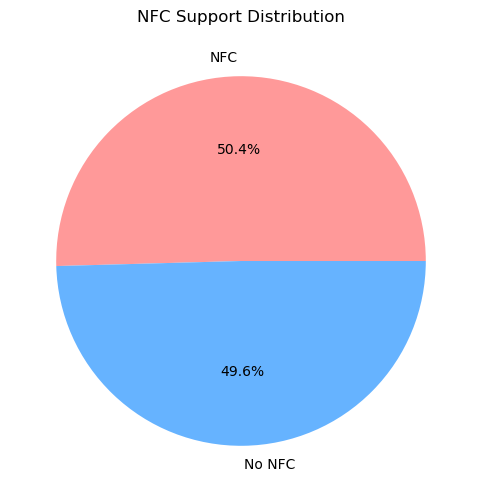

In [62]:
plt.figure(figsize=(6, 6))
nfc_counts = df['has_nfc'].value_counts()
plt.pie(nfc_counts, labels=['NFC', 'No NFC'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('NFC Support Distribution')
plt.show()


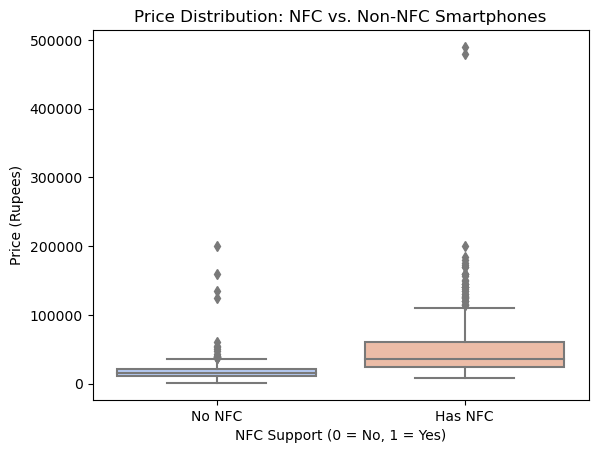

In [63]:
sns.boxplot(x='has_nfc', y='price', data=df, palette='coolwarm')
plt.title('Price Distribution: NFC vs. Non-NFC Smartphones')
plt.xlabel('NFC Support (0 = No, 1 = Yes)')
plt.ylabel('Price (Rupees)')
plt.xticks([0, 1], ['No NFC', 'Has NFC'])
plt.show()


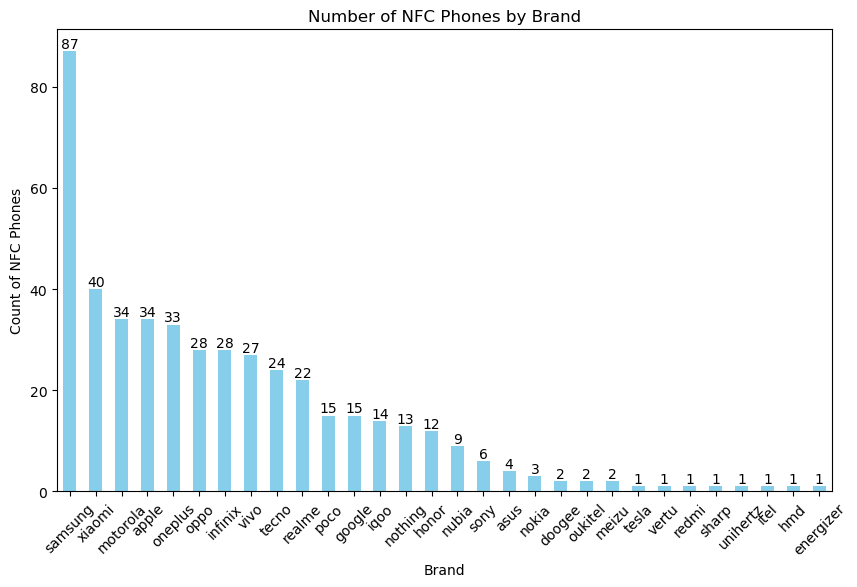

In [64]:
nfc_brands = df[df['has_nfc'] == 1]['brand_name'].value_counts()

plt.figure(figsize=(10, 6))
ax = nfc_brands.plot(kind='bar', color='skyblue')
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Number of NFC Phones by Brand')
plt.xlabel('Brand')
plt.ylabel('Count of NFC Phones')
plt.xticks(rotation=45)
plt.show()

### Observations:

From the above graphs, 

- **51%** of smartphones are **NFC-enabled**.
- **NFC** smartphones are generally **more expensive** than those without NFC.
- Brands like **Samsung, Xiaomi, Motorola, and Apple** have the **highest number** of NFC-enabled smartphones.

This suggests that NFC technology is more common in mid-range and premium models, particularly from leading brands.

<br>

## IR_Blaster

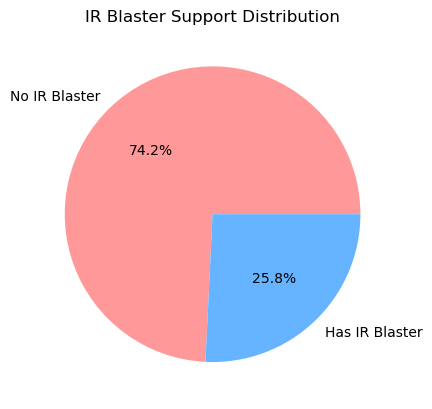

In [65]:
ir_counts = df['has_ir_blaster'].value_counts()
plt.pie(ir_counts, labels=['No IR Blaster', 'Has IR Blaster'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('IR Blaster Support Distribution')
plt.show()


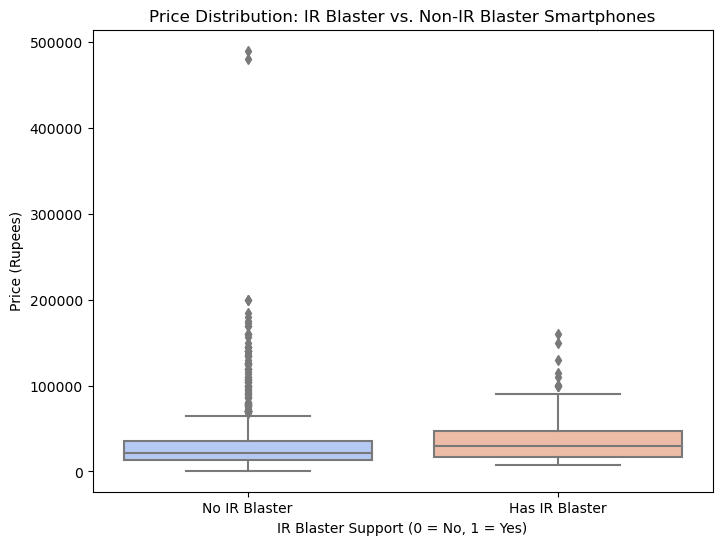

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='has_ir_blaster', y='price', data=df, palette='coolwarm')
plt.title('Price Distribution: IR Blaster vs. Non-IR Blaster Smartphones')
plt.xlabel('IR Blaster Support (0 = No, 1 = Yes)')
plt.ylabel('Price (Rupees)')
plt.xticks([0, 1], ['No IR Blaster', 'Has IR Blaster'])
plt.show()


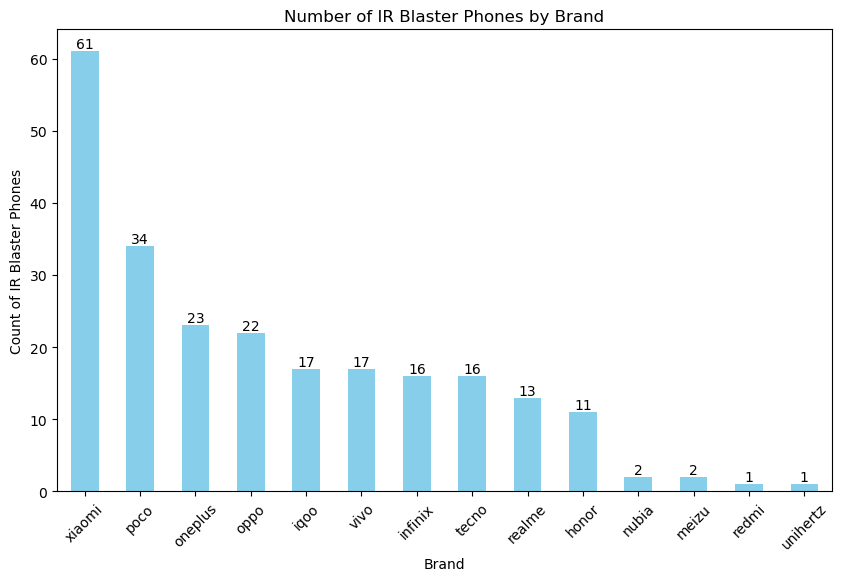

In [67]:
ir_brands = df[df['has_ir_blaster'] == 1]['brand_name'].value_counts()

plt.figure(figsize=(10, 6))
ax = ir_brands.plot(kind='bar', color='skyblue')
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Number of IR Blaster Phones by Brand')
plt.xlabel('Brand')
plt.ylabel('Count of IR Blaster Phones')
plt.xticks(rotation=45)
plt.show()

### Observations:

From the above graphs,

- **26%** of smartphones have an **IR blaster**.
- **IR blaster-enabled phones** have a **similar price range** compared to phones without this feature.
- Brands like **Xiaomi, Poco, OnePlus, and Oppo** include IR blasters in their models.
- Premium brands like **Apple, Samsung, and Google** do not offer any phones with an IR blaster.

This suggests that IR blasters are more common in mid-range and budget smartphones, while higher-end brands tend to exclude this feature.

<br>
<br>

# Key Insights

`1. Market Dominance`:
- **Samsung** leads with **129** devices, followed closely by **Vivo (110)** and **Realme (107)**.
- **Apple** offers fewer models **(34 devices)** but maintains the **highest average price** of **₹95,793.38**.
- **Itel**, **Lava**, and **Honor** have the **least market presence**.



`2. Price Distribution`:
- Prices range from **₹888** to **₹4,89,990**, with a high variability.
- **Budget Segment**: Over **500 smartphones** are priced **below ₹25,000**.
- **Mid-Range**: Around **200 models** fall between **₹25,000 - ₹50,000**, indicating a strong **mid-tier market**.
- **Premium Segment**: About **75 devices** each are in the **₹50,000 - ₹75,000** range and **above ₹75,000**.



`3. Screen Size`:
- Most smartphones have a **6 to 7-inch** screen, indicating a **standard size preference**.



`4. RAM Impact`:
- The majority feature **8GB** RAM, followed by **12GB** and **4GB**.
- **Higher RAM** generally correlates with **higher prices**, especially in **premium models**.



`5. Internal Memory`:
- **128GB** is the most common, followed by **256GB** and **64GB**.
- Devices with **512GB** and **1TB** are **rare** and **mostly premium models**.



`6. Operating System`:
- **Latest Android versions** (v13, v14, v15) are common.
- Newer OS versions are linked to **higher-priced smartphones**, reflecting their use in **premium devices**.



`7. Battery Capacity`:
- Most phones have **4000 - 5000 mAh** batteries.
- **Large-capacity** batteries (10,000 - 30,000 mAh) exist but are **not available in India**.
- **Battery size** has **minimal impact on pricing**.



`8. Fast Charging`:
- Available in **98%** of smartphones.
- More prevalent in **premium models** with **higher spec scores**.



`9. Processor Trends`:
- **Snapdragon** is the most common **(351 devices)**, followed by **Dimensity (340 devices)**.
- **Bionic** and **Tensor** processors are found in **premium smartphones**, making them the **costliest**.



`10. Memory Cards`:
- **53%** of devices support memory cards, typically in **budget** or **mid-range** models.
- **Premium** models often **lack this feature**.



`11. 5G Capability`:
- **83%** of smartphones are **5G-enabled**.
- Brands like **Samsung**, **Realme**, **Vivo**, and **Xiaomi** dominate this segment.
- **5G models** are generally **more expensive**.



`12. NFC Support`:
- Found in **51%** of devices, primarily in **mid-range** and **premium** models.
- **Samsung**, **Xiaomi**, **Motorola**, and **Apple** lead in **NFC-enabled devices**.



`13. IR Blaster`:
- Present in only **26%** of smartphones, mainly **mid-range** and **budget** models.
- Absent in **premium brands** like **Apple**, **Samsung**, and **Google**.